# Model the number of rides per day by hubway station in Boston

In [31]:
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np
from pylab import savefig

In [3]:
ridedata = pd.read_csv('../Data/Boston/BostonFeaturesByStation.csv')

In [7]:
y = ridedata['ridesperday'].values
X = ridedata[['popdensity', 'workdensity']].values

In [9]:
clf = linear_model.LinearRegression()
#clf.fit(X_train, y_train)
#clf.coef_
#clf.score(X_test, y_test)
scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='median_absolute_error')

In [13]:
scores, scores.mean(), scores.std()

(array([-10.73523537, -11.87888552,  -9.46333795, -11.13431327, -11.72379505]),
 -10.987113430533421,
 0.86544316169105984)

In [15]:
X.shape

(142, 2)

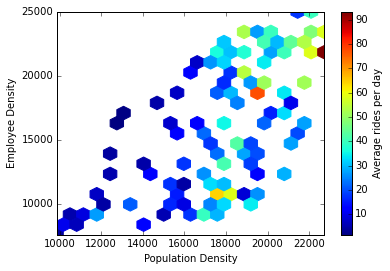

In [32]:
plt.hexbin(X[:,0], X[:, 1], C=y, gridsize=20)
cbar = plt.colorbar()
plt.xlabel('Population Density')
plt.ylabel('Employee Density')
cbar.set_label('Average rides per day')
savefig('../Figures/workpoprides.png')

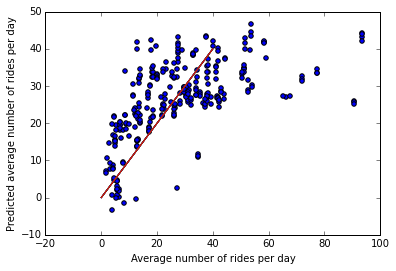

In [34]:
for isim in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
         X, y, test_size=0.2)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.plot([0,40], [0,40])
    plt.xlabel('Average number of rides per day')
    plt.ylabel('Predicted average number of rides per day')
savefig('../Figures/ridesperdayregression.png')

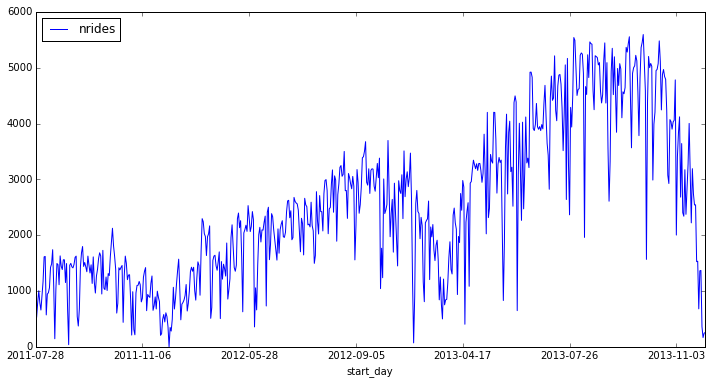

In [44]:
ridedata.plot(x='start_day', y='nrides', figsize=(12,6))